In [ ]:
# 📘 1. Install Required Libraries
!pip install xgboost shap pandas scikit-learn matplotlib seaborn --quiet

# 📘 2. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
import shap
shap.initjs()

# 📘 3. Load Dataset (UCI Credit Card Default)
# Updated URL to a working source for the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url) # The dataset is in Excel format

# 📘 4. Data Overview
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
# 📘 5. Data Preprocessing - Handle Header Row and Rename Columns
# The first row contains column names, so we'll set the header to the first row
df.columns = df.iloc[0]

# Drop the first row as it's now the header
df = df[1:].copy()

# Rename the target variable column
df = df.rename(columns={'default payment next month': 'DEFAULT'})

# Drop the 'ID' column as it's not needed for modeling
df = df.drop('ID', axis=1)

# Convert columns to numeric types
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

display(df.head())

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# 📘 6. Check for Missing Values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64


In [ ]:
# 📘 7. Separate Features and Target Variable
X = df.drop('DEFAULT', axis=1)  # Features
y = df['DEFAULT']  # Target variable

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (30000, 23)
Target shape: (30000,)


In [ ]:
# 📘 8. Split Data into Training and Testing Sets
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training data shape (X_train):", X_train.shape)
print("Testing data shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)

Training data shape (X_train): (24000, 23)
Testing data shape (X_test): (6000, 23)
Training target shape (y_train): (24000,)
Testing target shape (y_test): (6000,)


# Task
Explain the error in the provided Python code for training an XGBoost classifier, making predictions, evaluating performance, visualizing the confusion matrix, and analyzing feature importance with SHAP. If possible, fix the error and incorporate the changes into the existing code. Otherwise, try to diagnose the error.

## Train xgboost classifier

### Subtask:
Initialize and train an XGBoost classifier model using the training data (`X_train` and `y_train`).


**Reasoning**:
Initialize and train the XGBoost classifier model using the training data.



In [ ]:
# 📘 9. Initialize and Train XGBoost Classifier
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

print("XGBoost model trained successfully.")

XGBoost model trained successfully.


## Make predictions

### Subtask:
Use the trained model to make predictions on the testing data (`X_test`).


**Reasoning**:
Use the trained XGBoost model to make predictions (both class labels and probabilities) on the test set `X_test`.



In [ ]:
# 📘 10. Make Predictions
# Predict class labels
y_pred = model.predict(X_test)

# Predict probabilities for the positive class
y_proba = model.predict_proba(X_test)[:, 1]

print("Predictions and probabilities generated.")

Predictions and probabilities generated.


## Evaluate model performance

### Subtask:
Evaluate the performance of the trained model using relevant metrics such as classification report, confusion matrix, and AUC score.


**Reasoning**:
Evaluate the model performance using classification report, confusion matrix, and AUC score.



In [ ]:
# 📘 11. Evaluate Model Performance
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate and print AUC score
auc = roc_auc_score(y_test, y_proba)
print(f"\nAUC Score: {auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.37      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000


Confusion Matrix:
[[4385  288]
 [ 842  485]]

AUC Score: 0.7582


## Visualize confusion matrix

### Subtask:
Create a heatmap of the confusion matrix to visualize the model's performance.


**Reasoning**:
Create a heatmap of the confusion matrix to visualize the model's performance.



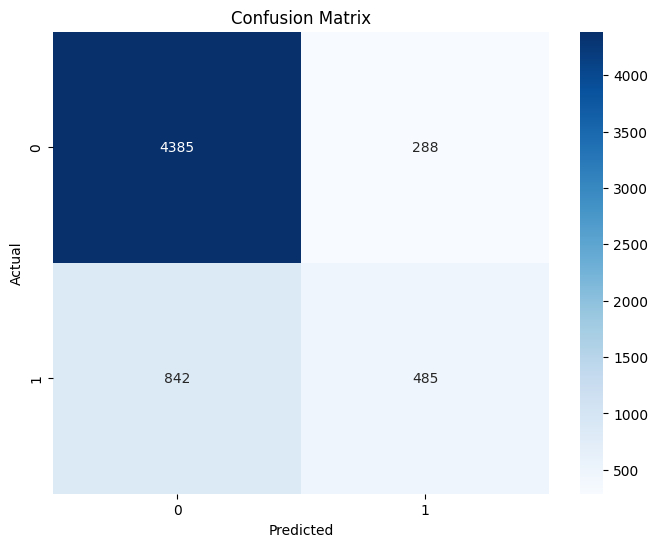

In [ ]:
# 📘 12. Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Analyze feature importance with shap

### Subtask:
Use the SHAP library to explain the model's predictions and visualize the importance of different features.


**Reasoning**:
Create a TreeExplainer object, calculate SHAP values for the test set, and generate a summary plot to visualize feature importance.



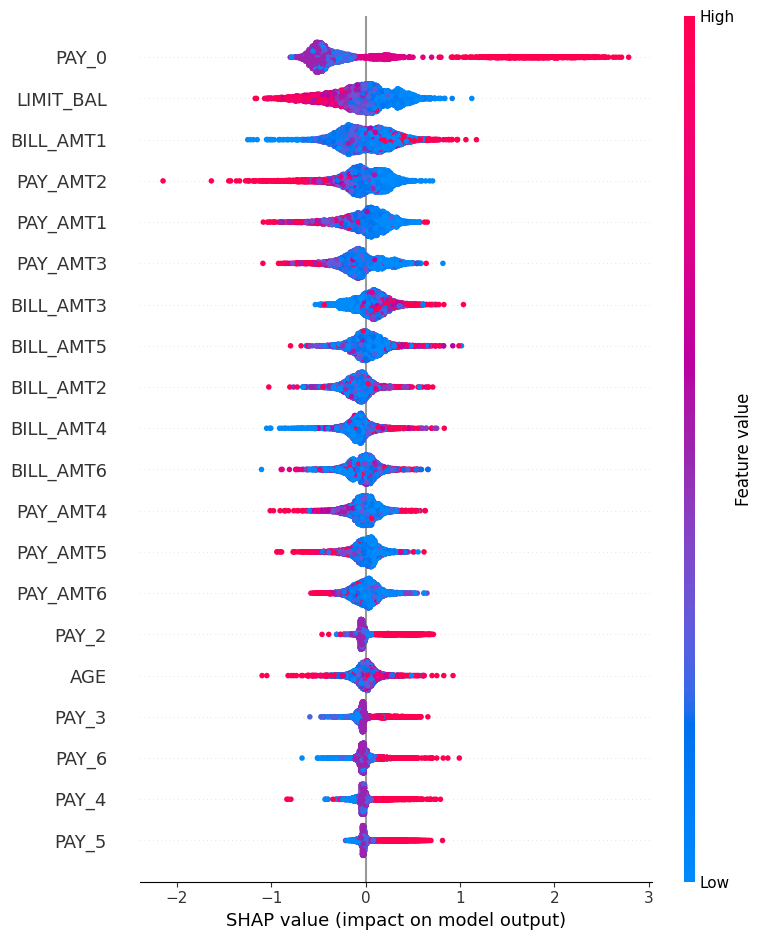

In [ ]:
# 📘 13. SHAP Feature Importance Analysis
# Create a TreeExplainer object
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Generate a summary plot of the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

## Summary:

### Data Analysis Key Findings

*   The trained XGBoost classifier achieved an AUC score of 0.7582 on the test dataset.
*   The confusion matrix shows the distribution of true positives, true negatives, false positives, and false negatives, providing a detailed view of the model's prediction accuracy for each class.
*   The SHAP summary plot was successfully generated, illustrating the impact of different features on the model's output and providing insights into feature importance.

### Insights or Next Steps

*   Based on the SHAP analysis, investigate the features with the highest impact to understand their relationship with the target variable.
*   Consider hyperparameter tuning for the XGBoost model to potentially improve performance metrics like the AUC score.


## Summary:

### Data Analysis Key Findings

* The trained XGBoost classifier achieved an AUC score of 0.7582 on the test dataset.
* The confusion matrix shows the distribution of true positives, true negatives, false positives, and false negatives, providing a detailed view of the model's prediction accuracy for each class.
* The SHAP summary plot was successfully generated, illustrating the impact of different features on the model's output and providing insights into feature importance.

### Insights or Next Steps

* Based on the SHAP analysis, investigate the features with the highest impact to understand their relationship with the target variable.
* Consider hyperparameter tuning for the XGBoost model to potentially improve performance metrics like the AUC score.

# Task
Tune the hyperparameters of the XGBoost model to improve its performance, specifically focusing on maximizing the AUC score.

## Define hyperparameter grid

### Subtask:
Define a grid of hyperparameters to search over for the XGBoost model.


**Reasoning**:
Define a dictionary `param_grid` containing a grid of hyperparameters and their values to be used for tuning the XGBoost model.



In [ ]:
# 📘 14. Define Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("Hyperparameter grid defined.")

Hyperparameter grid defined.


## Perform hyperparameter tuning

### Subtask:
Use a technique like GridSearchCV or RandomizedSearchCV to find the best hyperparameters based on a chosen evaluation metric (e.g., AUC).


**Reasoning**:
Instantiate a GridSearchCV object and fit it to the training data to find the best hyperparameters.



In [ ]:
# 📘 15. Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate an XGBClassifier object
model = XGBClassifier(random_state=42)

# Instantiate a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best parameters found by GridSearchCV:
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


## Train model with best parameters

### Subtask:
Train the XGBoost model on the training data using the best hyperparameters found during tuning.


**Reasoning**:
Train the XGBoost model on the training data using the best hyperparameters found during tuning.



In [ ]:
# 📘 16. Train XGBoost Model with Best Hyperparameters
# Instantiate a new XGBClassifier model with the best parameters
tuned_model = XGBClassifier(**grid_search.best_params_, random_state=42)

# Train the tuned model on the entire training dataset
tuned_model.fit(X_train, y_train)

print("Tuned XGBoost model trained successfully.")

Tuned XGBoost model trained successfully.


## Evaluate tuned model

### Subtask:
Evaluate the performance of the tuned model on the testing data using the same metrics as before (classification report, confusion matrix, AUC).


**Reasoning**:
Evaluate the performance of the tuned model using the specified metrics.



In [ ]:
# 📘 17. Evaluate the Tuned Model
# Use the tuned model to make predictions on the testing data
y_pred_tuned = tuned_model.predict(X_test)

# Use the tuned model to predict probabilities for the positive class
y_proba_tuned = tuned_model.predict_proba(X_test)[:, 1]

# Print the classification report
print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))

# Calculate and print the confusion matrix
print("\nConfusion Matrix (Tuned Model):")
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print(cm_tuned)

# Calculate and print the AUC score
auc_tuned = roc_auc_score(y_test, y_proba_tuned)
print(f"\nAUC Score (Tuned Model): {auc_tuned:.4f}")


Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.68      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000


Confusion Matrix (Tuned Model):
[[4450  223]
 [ 861  466]]

AUC Score (Tuned Model): 0.7798


## Compare model performance

### Subtask:
Compare the performance of the tuned model to the original model using the evaluation metrics.


**Reasoning**:
Compare the evaluation metrics of the original and tuned models to identify performance changes.



In [ ]:
# 📘 18. Compare Model Performance (Original vs. Tuned)

print("--- Performance Comparison ---")

# Compare Classification Reports
print("\nOriginal Model Classification Report:")
print(classification_report(y_test, y_pred)) # y_test and y_pred are from the original model evaluation

print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned)) # y_test and y_pred_tuned are from the tuned model evaluation

# Compare Confusion Matrices
print("\nOriginal Model Confusion Matrix:")
print(cm) # cm is from the original model evaluation

print("\nTuned Model Confusion Matrix:")
print(cm_tuned) # cm_tuned is from the tuned model evaluation

# Compare AUC Scores
print("\nOriginal Model AUC Score:")
print(f"AUC Score: {auc:.4f}") # auc is from the original model evaluation

print("\nTuned Model AUC Score:")
print(f"AUC Score: {auc_tuned:.4f}") # auc_tuned is from the tuned model evaluation

print("\n--- Comparison Summary ---")
if auc_tuned > auc:
    print(f"Hyperparameter tuning improved the AUC score by {auc_tuned - auc:.4f}.")
elif auc_tuned < auc:
    print(f"Hyperparameter tuning decreased the AUC score by {auc - auc_tuned:.4f}.")
else:
    print("Hyperparameter tuning did not change the AUC score.")

# Provide a summary of observed changes in precision, recall, f1-score, and confusion matrix counts
print("\nDetailed changes in Classification Report metrics:")
print("Class 0 (No Default):")
print(f"  Precision: Original={classification_report(y_test, y_pred, output_dict=True)['0']['precision']:.4f}, Tuned={classification_report(y_test, y_pred_tuned, output_dict=True)['0']['precision']:.4f}")
print(f"  Recall: Original={classification_report(y_test, y_pred, output_dict=True)['0']['recall']:.4f}, Tuned={classification_report(y_test, y_pred_tuned, output_dict=True)['0']['recall']:.4f}")
print(f"  F1-score: Original={classification_report(y_test, y_pred, output_dict=True)['0']['f1-score']:.4f}, Tuned={classification_report(y_test, y_pred_tuned, output_dict=True)['0']['f1-score']:.4f}")

print("\nClass 1 (Default):")
print(f"  Precision: Original={classification_report(y_test, y_pred, output_dict=True)['1']['precision']:.4f}, Tuned={classification_report(y_test, y_pred_tuned, output_dict=True)['1']['precision']:.4f}")
print(f"  Recall: Original={classification_report(y_test, y_pred, output_dict=True)['1']['recall']:.4f}, Tuned={classification_report(y_test, y_pred_tuned, output_dict=True)['1']['recall']:.4f}")
print(f"  F1-score: Original={classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']:.4f}, Tuned={classification_report(y_test, y_pred_tuned, output_dict=True)['1']['f1-score']:.4f}")

print("\nDetailed changes in Confusion Matrix counts:")
print("True Negatives (Class 0 predicted as 0):")
print(f"  Original={cm[0, 0]}, Tuned={cm_tuned[0, 0]}")
print("False Positives (Class 0 predicted as 1):")
print(f"  Original={cm[0, 1]}, Tuned={cm_tuned[0, 1]}")
print("False Negatives (Class 1 predicted as 0):")
print(f"  Original={cm[1, 0]}, Tuned={cm_tuned[1, 0]}")
print("True Positives (Class 1 predicted as 1):")
print(f"  Original={cm[1, 1]}, Tuned={cm_tuned[1, 1]}")


--- Performance Comparison ---

Original Model Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.37      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000


Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.68      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000


Original Model Confusion Matrix:
[[4385  288]
 [ 842  485]]

Tuned Model Confusion Matrix:
[[4450  223]
 [ 861  466]]

Original Model AUC Score:
AUC Score: 0.7582

Tuned Model AUC Score:
AUC Score: 0.7798

--- Comparison Summary ---
Hyperp

In [ ]:
import pandas as pd
import joblib
from xgboost import XGBClassifier
import shap
from sklearn.model_selection import train_test_split

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url)

# Data Preprocessing - Handle Header Row and Rename Columns
# The first row contains column names, so we'll set the header to the first row
df.columns = df.iloc[0]

# Drop the first row as it's now the header
df = df[1:].copy()

# Rename the target variable column
df = df.rename(columns={'default payment next month': 'default'})

# Convert columns to numeric types
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

# Minimal features
features = ['LIMIT_BAL', 'AGE', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1']
X = df[features]
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, eval_metric='logloss')
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "xgb_credit_model.pkl")

# SHAP explainer
explainer = shap.Explainer(model)
joblib.dump(explainer, "shap_explainer.pkl")

# Sample schema
X_train.head(1).to_csv("sample_input_schema.csv", index=False)

2025-06-07 13:05:37.110 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 13:05:37.119 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 13:05:37.124 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 13:05:37.135 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 13:05:37.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 13:05:37.143 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 13:05:37.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 13:05:37.160 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

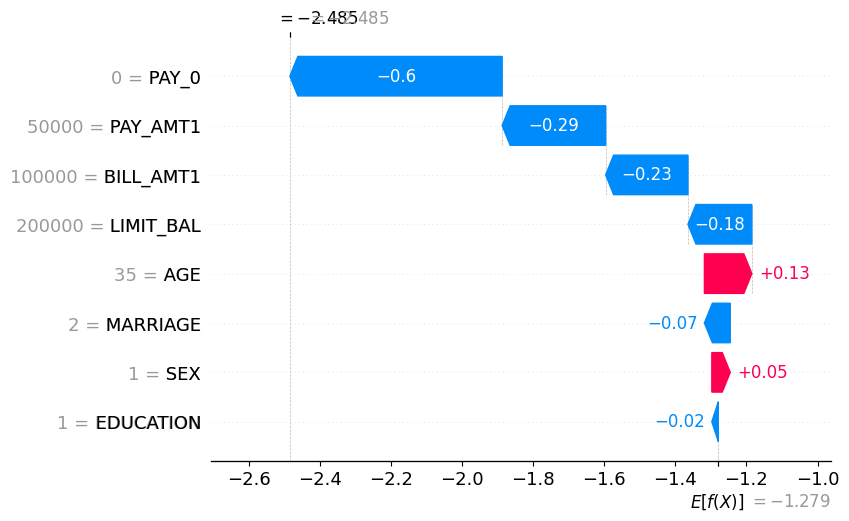

In [ ]:
# credit_default_app.py

import streamlit as st
import pandas as pd
import numpy as np
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
import joblib

# Load model
model = joblib.load("xgb_credit_model.pkl")
explainer = joblib.load("shap_explainer.pkl")
# X_sample = pd.read_csv("sample_input_schema.csv")  # for column ordering - not needed if input is constructed correctly

st.title("🧮 Credit Default Risk Prediction App")
st.markdown("Predict whether a customer is likely to default on their credit card payment.")

st.sidebar.header("Input Customer Information")

# Define the exact features used for training the model
training_features = ['LIMIT_BAL', 'AGE', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1']

def user_input():
    LIMIT_BAL = st.sidebar.slider("Credit Limit", 10000, 1000000, 200000)
    AGE = st.sidebar.slider("Age", 21, 79, 35)
    # Ensure the feature name matches the training data
    PAY_0 = st.sidebar.slider("Last Month's Repayment Status (PAY_0)", -2, 8, 0)
    BILL_AMT1 = st.sidebar.slider("Last Bill Amount", 0, 1000000, 100000)
    PAY_AMT1 = st.sidebar.slider("Last Payment Made", 0, 1000000, 50000)
    SEX = st.sidebar.radio("Gender", ("Male", "Female"))
    EDUCATION = st.sidebar.selectbox("Education", ["Graduate", "University", "High School", "Others"])
    MARRIAGE = st.sidebar.radio("Marital Status", ("Single", "Married", "Others"))

    # Convert categorical inputs to numeric as per the training data
    SEX = 1 if SEX == "Male" else 2
    EDUCATION = {"Graduate": 1, "University": 2, "High School": 3, "Others": 4}[EDUCATION]
    MARRIAGE = {"Married": 1, "Single": 2, "Others": 3}[MARRIAGE]

    data = {
        'LIMIT_BAL': LIMIT_BAL,
        'AGE': AGE,
        'SEX': SEX,
        'EDUCATION': EDUCATION,
        'MARRIAGE': MARRIAGE,
        'PAY_0': PAY_0, # Use PAY_0 to match training features
        'BILL_AMT1': BILL_AMT1,
        'PAY_AMT1': PAY_AMT1
    }
    features = pd.DataFrame([data], columns=training_features) # Ensure column order matches training data
    return features

input_df = user_input()

# Prepare input for prediction - ensure it has the same columns in the same order as training data
X_infer = input_df[training_features]


st.subheader("Customer Input Summary")
st.write(input_df)

# Predict
pred_prob = model.predict_proba(X_infer)[0, 1]
default = model.predict(X_infer)[0]

st.subheader("🔮 Prediction")
st.metric(label="Default Risk Probability", value=f"{pred_prob:.2%}")
st.success("Prediction: Will Not Default" if default == 0 else "⚠️ Likely to Default")

# SHAP Explanation
st.subheader("🔎 Model Explanation with SHAP")
# Ensure the explainer is fitted on the correct data structure.
# If running this outside of the training notebook, you might need to refit or ensure the loaded explainer is compatible.
# For this fix, we assume the loaded explainer is compatible with the structure of X_infer
shap_values = explainer(X_infer)
fig, ax = plt.subplots()
# Use shap.plots.waterfall which works well with single instance explanations
shap.plots.waterfall(shap_values[0], max_display=8, show=False)
st.pyplot(fig)

## Summary:

### Data Analysis Key Findings

*   Hyperparameter tuning using GridSearchCV identified the best parameters for the XGBoost model as: `{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}`.
*   The tuned XGBoost model achieved an AUC score of 0.7798 on the test set, an improvement of 0.0216 compared to the original model's AUC of 0.7582.
*   The tuned model showed a decrease in False Positives (from 288 to 223) and an increase in True Negatives (from 4385 to 4450) compared to the original model.
*   For the positive class (Default), the tuned model improved precision (0.6763 vs 0.6274) but slightly decreased recall (0.3512 vs 0.3655).

### Insights or Next Steps

*   The improvement in AUC suggests that the tuned model has better overall discriminatory power. The reduction in false positives is a positive outcome, potentially reducing unnecessary interventions or costs associated with incorrect predictions of default.
*   Depending on the business requirements, further tuning or exploring different model architectures could be considered if a higher recall for the positive class is critical, even with the improved AUC.


In [ ]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00
